In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import os
import cmath

Data Acquisition

In [38]:
#in questo modo i percorsi funzionano sia su windows che su linux
path_import = os.path.join("raw_data","01_alluminio_frattale_raw.xlsx")
dataexp_1 = pd.read_excel(path_import, 'Part I')


lengths =  np.array(dataexp_1['Mean Length'])
mass = np.array(dataexp_1['Mean Mass'])

#dataexp_1

Plots Setup

In [33]:
plt.rcParams.update({
    "text.usetex": False, #sul mio pc non va se imposto questo su True (~mikk)
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "font.size": 15,
    "legend.fontsize": 10,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

Part I: Aluminum foil squares 

/home/mikk/.local/lib/python3.10/site-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/mikk/.local/lib/python3.10/site-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/tmp/ipykernel_721811/3933850611.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


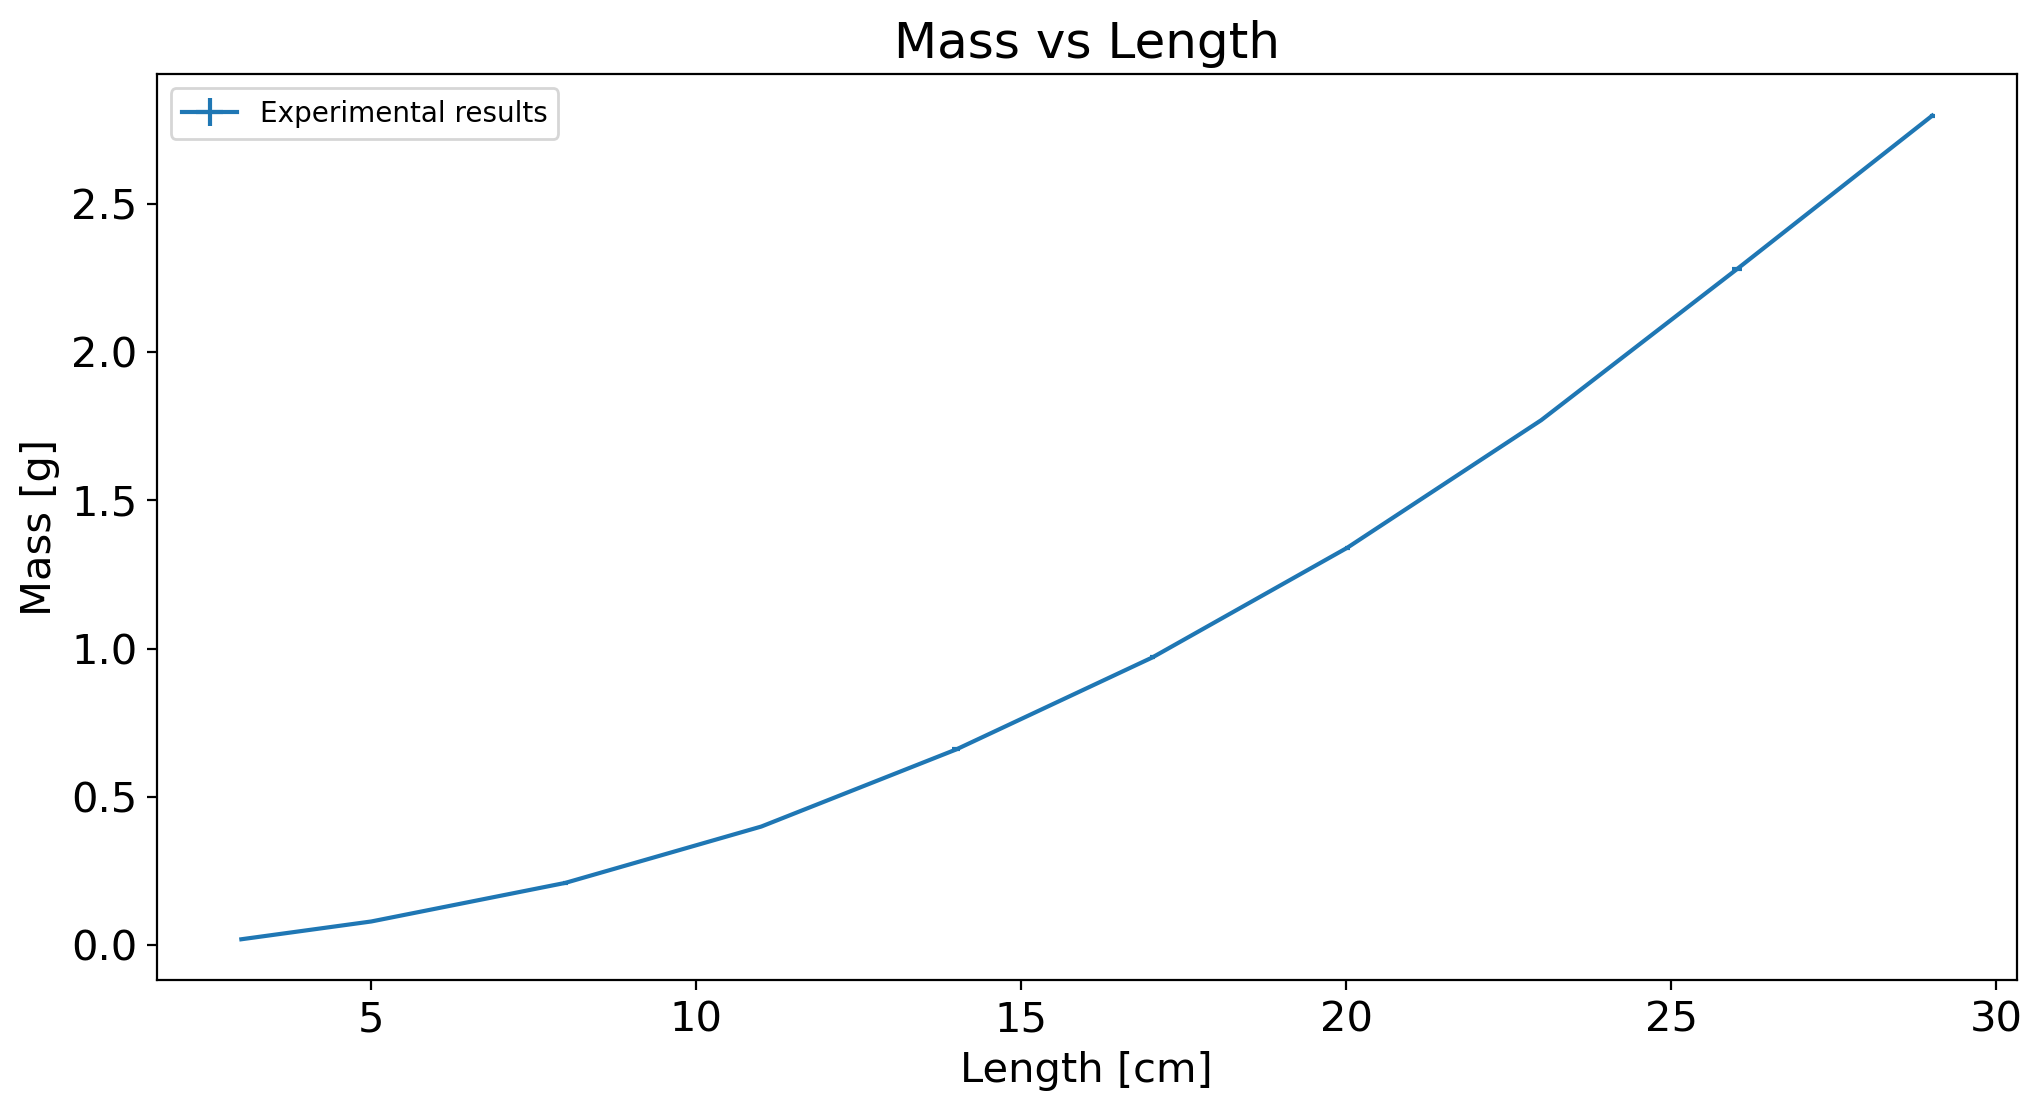

In [37]:
fig, ax = plt.subplots(figsize=(12, 6), dpi = 200)

ax.errorbar(x=dataexp_1['Mean Length'], y=dataexp_1['Mean Mass'], xerr = dataexp_1['Error Length'], yerr = dataexp_1['Error Mass'], label = r'Experimental results')

ax.set_xlabel(r'Length [cm]')
ax.set_ylabel(r'Mass [g]')
ax.set_title(r'Mass vs Length')
ax.legend()
fig.show()


path_export = os.path.join("grafici","pic01.png")
fig.savefig(path_export)